# Data Exploration - AI/ML Market Analysis

This notebook performs comprehensive exploration of the AI/ML market datasets to understand the structure, quality, and patterns in the data.

## Datasets:
1. **AI_ML_popularity.csv**: Global AI popularity data by country/city with search trends
2. **The_Rise_of_AI.csv**: AI market metrics from 2018-2025 including revenue, adoption rates, job impacts

## Objectives:
- Load and examine all datasets
- Understand data structure and quality
- Identify missing values, outliers, and anomalies
- Generate statistical summaries
- Document initial insights

## 1. Import Required Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utilities
import warnings
import os
from pathlib import Path

# Configuration
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Libraries imported successfully!
Pandas version: 2.3.1
Numpy version: 2.1.3


## 2. Load Datasets

In [ ]:
# Define data paths
data_dir = Path('../data/raw')
popularity_file = data_dir / 'AI_ML_popularity.csv'
market_file = data_dir / 'The_Rise_of_AI.csv'

# Load datasets with proper encoding handling
try:
    # Try UTF-8 first, then fallback to other encodings
    try:
        popularity_df = pd.read_csv(popularity_file, encoding='utf-8')
    except UnicodeDecodeError:
        popularity_df = pd.read_csv(popularity_file, encoding='latin-1')
    
    try:
        market_df = pd.read_csv(market_file, encoding='utf-8')
    except UnicodeDecodeError:
        market_df = pd.read_csv(market_file, encoding='latin-1')
    
except Exception as e:

Loading datasets...
Popularity data: True
Market data: True

✅ Datasets loaded successfully!
Popularity dataset: (250, 12)
Market dataset: (8, 22)


## 3. Initial Data Examination

In [ ]:
# Dataset shapes and basic info
popularity_df.info()
market_df.info()

DATASET OVERVIEW
📊 AI Popularity Dataset Shape: (250, 12)
📊 AI Market Dataset Shape: (8, 22)

AI POPULARITY DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         250 non-null    object 
 1   Ai and ML(Popularity)           72 non-null     float64
 2   City                            200 non-null    object 
 3   Ai and ML(Popularity).1         200 non-null    float64
 4   Top (Searches)                  25 non-null     object 
 5   Popularity                      25 non-null     float64
 6   Rising (Searches)               25 non-null     object 
 7   Rising (Searches) Percentage    25 non-null     object 
 8   Top (Searches).1                25 non-null     object 
 9   Popularity.1                    25 non-null     float64
 10  Rising (Searches).1             25 no

## 4. Data Structure Analysis

In [ ]:
# Examine column names and first few rows
display(popularity_df.head())
display(popularity_df.columns.tolist())

AI POPULARITY DATASET - FIRST 5 ROWS


,Country,Ai and ML(Popularity),City,Ai and ML(Popularity).1,Top (Searches),Popularity,Rising (Searches),Rising (Searches) Percentage,Top (Searches).1,Popularity.1,Rising (Searches).1,Rising (Searches) Percentage.1
0,Tuvalu,NaN,Sapror,100.0,Artificial intelligence,100.0,Character.ai,5000%,ai character,100.0,chatgpt,5000%
1,Vietnam,100.0,Sil Kapra,74.0,Character.ai,14.0,ChatGPT,5000%,ai generator,48.0,chatgpt ai,5000%
2,China,72.0,Stanford,72.0,Online chat,5.0,Gemini,5000%,ai image,33.0,chat gpt,5000%
3,Romania,63.0,Shenzhen,58.0,OpenAI,4.0,AI Chatbot,5000%,ai chat,30.0,chat gpt ai,5000%
4,Samoa,NaN,Shanghai,57.0,ChatGPT,3.0,Midjourney,5000%,google ai,26.0,bard ai,5000%



AI POPULARITY DATASET - COLUMN NAMES
 1. Country
 2. Ai and ML(Popularity)
 3. City
 4. Ai and ML(Popularity).1
 5. Top (Searches)
 6. Popularity
 7. Rising (Searches)
 8. Rising (Searches) Percentage
 9. Top (Searches).1
10. Popularity.1
11. Rising (Searches).1
12. Rising (Searches) Percentage.1


In [ ]:
display(market_df.head())
display(market_df.columns.tolist())

AI MARKET DATASET - FIRST 5 ROWS


,Year,AI Software Revenue(in Billions),Global AI Market Value(in Billions),AI Adoption (%),Organizations Using AI,Organizations Planning to Implement AI,Global Expectation for AI Adoption (%),Estimated Jobs Eliminated by AI (millions),Estimated New Jobs Created by AI (millions),Net Job Loss in the US,Organizations Believing AI Provides Competitive Edge,Companies Prioritizing AI in Strategy,Estimated Revenue Increase from AI (trillions USD),Marketers Believing AI Improves Email Revenue,Expected Increase in Employee Productivity Due to AI (%),Americans Using Voice Assistants (%),Digital Voice Assistants (billions of devices),Medical Professionals Using AI for Diagnosis,AI Contribution to Healthcare(in Billions),Jobs at High Risk of Automation - Transportation & Storage (%),Jobs at High Risk of Automation - Wholesale & Retail Trade,Jobs at High Risk of Automation - Manufacturing
0,2018,10.10,29.5,10%,35%,40%,40%,10%,5%,7%,87%,83%,1.2,41.29%,5%,20%,1.5,38%,461,35%,44%,46.40%
1,2019,14.69,35.0,20%,37%,42%,47%,15%,8%,6.50%,88%,84%,1.8,42%,7%,25%,2.0,39%,465,38%,45%,47%
2,2020,22.59,45.0,30%,40%,45%,54%,20%,12%,6%,88%,85%,2.4,43%,9%,30%,2.6,41%,470,40%,46%,47.50%
3,2021,34.87,65.0,35%,42%,47%,61%,25%,16%,5.50%,89%,86%,3.0,44%,11%,35%,3.2,43%,475,43%,47%,48%
4,2022,51.27,140.0,35%,45%,50%,68%,30%,20%,5%,90%,87%,3.6,45%,13%,40%,3.8,45%,480,45%,48%,48.50%



AI MARKET DATASET - COLUMN NAMES
 1. Year
 2. AI Software Revenue(in Billions)
 3. Global AI Market Value(in Billions)
 4. AI Adoption (%)
 5. Organizations Using AI
 6. Organizations Planning to Implement AI
 7. Global Expectation for AI Adoption (%)
 8. Estimated Jobs Eliminated by AI (millions)
 9. Estimated New Jobs Created by AI (millions)
10. Net Job Loss in the US
11. Organizations Believing AI Provides Competitive Edge
12. Companies Prioritizing AI in Strategy
13. Estimated Revenue Increase from AI (trillions USD)
14. Marketers Believing AI Improves Email Revenue
15. Expected Increase in Employee Productivity Due to AI (%)
16. Americans Using Voice Assistants (%)
17. Digital Voice Assistants (billions of devices)
18. Medical Professionals Using AI for Diagnosis
19. AI Contribution to Healthcare(in Billions)
20. Jobs at High Risk of Automation - Transportation & Storage (%)
21. Jobs at High Risk of Automation - Wholesale & Retail Trade
22. Jobs at High Risk of Automation - Manu

## 5. Missing Values Analysis

In [ ]:
# Missing values analysis for popularity dataset
missing_pop = popularity_df.isnull().sum()
missing_pop_pct = (missing_pop / len(popularity_df)) * 100

missing_summary_pop = pd.DataFrame({
    'Missing_Count': missing_pop,
    'Missing_Percentage': missing_pop_pct
})
missing_summary_pop = missing_summary_pop[missing_summary_pop['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_summary_pop) > 0:
    display(missing_summary_pop)

MISSING VALUES ANALYSIS - AI POPULARITY DATASET


,Missing_Count,Missing_Percentage
Rising (Searches),225,90.0
Popularity,225,90.0
Top (Searches),225,90.0
Top (Searches).1,225,90.0
Popularity.1,225,90.0
Rising (Searches).1,225,90.0
Rising (Searches) Percentage,225,90.0
Rising (Searches) Percentage.1,225,90.0
Ai and ML(Popularity),178,71.2
Ai and ML(Popularity).1,50,20.0


In [ ]:
# Missing values analysis for market dataset
missing_market = market_df.isnull().sum()
missing_market_pct = (missing_market / len(market_df)) * 100

missing_summary_market = pd.DataFrame({
    'Missing_Count': missing_market,
    'Missing_Percentage': missing_market_pct
})
missing_summary_market = missing_summary_market[missing_summary_market['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_summary_market) > 0:
    display(missing_summary_market)

MISSING VALUES ANALYSIS - AI MARKET DATASET
✅ No missing values found in AI Market dataset!


## 6. Statistical Summary

In [ ]:
# Statistical summary for market dataset (numerical columns)
display(market_df.describe())

# Check data types
display(market_df.dtypes)

STATISTICAL SUMMARY - AI MARKET DATASET


,Year,AI Software Revenue(in Billions),Global AI Market Value(in Billions),Estimated Revenue Increase from AI (trillions USD),Digital Voice Assistants (billions of devices),AI Contribution to Healthcare(in Billions)
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2021.50000,53.108750,350.437500,3.312500,3.500000,478.250000
std,2.44949,41.283101,604.676386,1.490386,1.429286,13.155661
min,2018.00000,10.100000,29.500000,1.200000,1.500000,461.000000
25%,2019.75000,20.615000,42.500000,2.250000,2.450000,468.750000
50%,2021.50000,43.070000,102.500000,3.300000,3.500000,477.500000
75%,2023.25000,76.807500,309.250000,4.350000,4.550000,486.250000
max,2025.00000,126.000000,1810.000000,5.500000,5.500000,500.000000



DATA TYPES - AI MARKET DATASET
Year                                                                int64
AI Software Revenue(in Billions)                                  float64
Global AI Market Value(in Billions)                               float64
AI Adoption (%)                                                    object
Organizations Using AI                                             object
Organizations Planning to Implement AI                             object
Global Expectation for AI Adoption (%)                             object
Estimated Jobs Eliminated by AI (millions)                         object
Estimated New Jobs Created by AI (millions)                        object
Net Job Loss in the US                                             object
Organizations Believing AI Provides Competitive Edge               object
Companies Prioritizing AI in Strategy                              object
Estimated Revenue Increase from AI (trillions USD)                float64
Market

In [ ]:
# Statistical summary for popularity dataset
# Select numeric columns for statistical analysis
numeric_cols = popularity_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    display(popularity_df[numeric_cols].describe())

display(popularity_df.dtypes)

STATISTICAL SUMMARY - AI POPULARITY DATASET


,Ai and ML(Popularity),Ai and ML(Popularity).1,Popularity,Popularity.1
count,72.000000,200.000000,25.000000,25.000000
mean,21.277778,28.720000,5.880000,20.800000
std,15.845399,9.192612,19.833305,18.717194
min,4.000000,21.000000,-1.000000,8.000000
25%,12.000000,23.750000,1.000000,13.000000
50%,17.000000,26.000000,2.000000,15.000000
75%,24.250000,30.250000,3.000000,19.000000
max,100.000000,100.000000,100.000000,100.000000



DATA TYPES - AI POPULARITY DATASET
Country                            object
Ai and ML(Popularity)             float64
City                               object
Ai and ML(Popularity).1           float64
Top (Searches)                     object
Popularity                        float64
Rising (Searches)                  object
Rising (Searches) Percentage       object
Top (Searches).1                   object
Popularity.1                      float64
Rising (Searches).1                object
Rising (Searches) Percentage.1     object
dtype: object


## 7. Data Quality Assessment

In [ ]:
# Data quality assessment function
def assess_data_quality(df, dataset_name):
    """
    Comprehensive data quality assessment
    """
    # Basic stats
    shape = df.shape
    memory_usage = df.memory_usage(deep=True).sum() / 1024**2
    
    # Missing values
    missing_total = df.isnull().sum().sum()
    missing_pct = (missing_total / (df.shape[0] * df.shape[1])) * 100
    
    # Duplicates
    duplicates = df.duplicated().sum()
    
    # Data types
    dtype_counts = df.dtypes.value_counts()
    
    return {
        'shape': df.shape,
        'missing_total': missing_total,
        'missing_percentage': missing_pct,
        'duplicates': duplicates,
        'dtypes': dtype_counts
    }

# Assess both datasets
market_quality = assess_data_quality(market_df, "AI MARKET DATA")
popularity_quality = assess_data_quality(popularity_df, "AI POPULARITY DATA")


DATA QUALITY ASSESSMENT - AI MARKET DATA
📏 Shape: 8 rows × 22 columns
💾 Memory usage: 0.01 MB
❓ Missing values: 0 (0.00%)
🔄 Duplicate rows: 0

📊 Data Types Distribution:
  - object: 16 columns
  - float64: 4 columns
  - int64: 2 columns

DATA QUALITY ASSESSMENT - AI POPULARITY DATA
📏 Shape: 250 rows × 12 columns
💾 Memory usage: 0.09 MB
❓ Missing values: 2,078 (69.27%)
🔄 Duplicate rows: 0

📊 Data Types Distribution:
  - object: 8 columns
  - float64: 4 columns


## 8. Initial Visual Exploration

In [11]:
# Create visualizations for market trends
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('AI Software Revenue Over Time', 'Global AI Market Value', 
                   'AI Adoption Rate', 'Job Impact Analysis'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# AI Software Revenue
fig.add_trace(
    go.Scatter(x=market_df['Year'], 
               y=market_df['AI Software Revenue(in Billions)'],
               mode='lines+markers',
               name='AI Revenue',
               line=dict(color='blue', width=3)),
    row=1, col=1
)

# Global AI Market Value
fig.add_trace(
    go.Scatter(x=market_df['Year'], 
               y=market_df['Global AI Market Value(in Billions)'],
               mode='lines+markers',
               name='Market Value',
               line=dict(color='green', width=3)),
    row=1, col=2
)

# AI Adoption Rate
fig.add_trace(
    go.Scatter(x=market_df['Year'], 
               y=market_df['AI Adoption (%)'].str.rstrip('%').astype(float),
               mode='lines+markers',
               name='Adoption Rate',
               line=dict(color='orange', width=3)),
    row=2, col=1
)

# Job Impact (Jobs Eliminated vs Created)
fig.add_trace(
    go.Scatter(x=market_df['Year'], 
               y=market_df['Estimated Jobs Eliminated by AI (millions)'],
               mode='lines+markers',
               name='Jobs Eliminated',
               line=dict(color='red', width=3)),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(x=market_df['Year'], 
               y=market_df['Estimated New Jobs Created by AI (millions)'],
               mode='lines+markers',
               name='Jobs Created',
               line=dict(color='green', width=3)),
    row=2, col=2
)

fig.update_layout(height=800, title_text="AI Market Trends Overview (2018-2025)")
fig.show()

## 9. Detailed Column Analysis

In [ ]:
# Detailed analysis of market dataset columns
column_info = []
for col in market_df.columns:
    info = {
        'column': col,
        'dtype': str(market_df[col].dtype),
        'non_null_count': market_df[col].count(),
        'total_count': len(market_df)
    }
    
    if market_df[col].dtype == 'object':
        # For string columns
        unique_vals = market_df[col].nunique()
        info['unique_values'] = unique_vals
        if unique_vals <= 10:
            info['values'] = list(market_df[col].unique())
    else:
        # For numeric columns
        info['min'] = market_df[col].min()
        info['max'] = market_df[col].max()
        info['mean'] = market_df[col].mean()
        info['std'] = market_df[col].std()
    
    column_info.append(info)

# Display as DataFrame for better readability
display(pd.DataFrame(column_info))

DETAILED COLUMN ANALYSIS - AI MARKET DATASET

📊 Column: Year
   Data Type: int64
   Non-null Count: 8/8
   Min: 2018
   Max: 2025
   Mean: 2021.50
   Std: 2.45

📊 Column: AI Software Revenue(in Billions)
   Data Type: float64
   Non-null Count: 8/8
   Min: 10.1
   Max: 126.0
   Mean: 53.11
   Std: 41.28

📊 Column: Global AI Market Value(in Billions)
   Data Type: float64
   Non-null Count: 8/8
   Min: 29.5
   Max: 1810.0
   Mean: 350.44
   Std: 604.68

📊 Column: AI Adoption (%)
   Data Type: object
   Non-null Count: 8/8
   Unique Values: 6
   Values: ['10%', '20%', '30%', '35%', '40%', '63%']

📊 Column: Organizations Using AI
   Data Type: object
   Non-null Count: 8/8
   Unique Values: 8
   Values: ['35%', '37%', '40%', '42%', '45%', '48%', '50%', '55%']

📊 Column: Organizations Planning to Implement AI
   Data Type: object
   Non-null Count: 8/8
   Unique Values: 8
   Values: ['40%', '42%', '45%', '47%', '50%', '53%', '55%', '58%']

📊 Column: Global Expectation for AI Adoption (%)
 

## 10. Data Relationships and Correlations

Percentage columns found: ['AI Adoption (%)', 'Organizations Using AI', 'Organizations Planning to Implement AI', 'Global Expectation for AI Adoption (%)', 'Estimated Jobs Eliminated by AI (millions)', 'Estimated New Jobs Created by AI (millions)', 'Net Job Loss in the US', 'Organizations Believing AI Provides Competitive Edge', 'Companies Prioritizing AI in Strategy', 'Marketers Believing AI Improves Email Revenue', 'Expected Increase in Employee Productivity Due to AI (%)', 'Americans Using Voice Assistants (%)', 'Medical Professionals Using AI for Diagnosis', 'Jobs at High Risk of Automation - Transportation & Storage (%)', 'Jobs at High Risk of Automation - Wholesale & Retail Trade', 'Jobs at High Risk of Automation - Manufacturing']

Numeric columns for correlation: ['Year', 'AI Software Revenue(in Billions)', 'Global AI Market Value(in Billions)', 'AI Adoption (%)', 'Organizations Using AI', 'Organizations Planning to Implement AI', 'Global Expectation for AI Adoption (%)', 'Esti

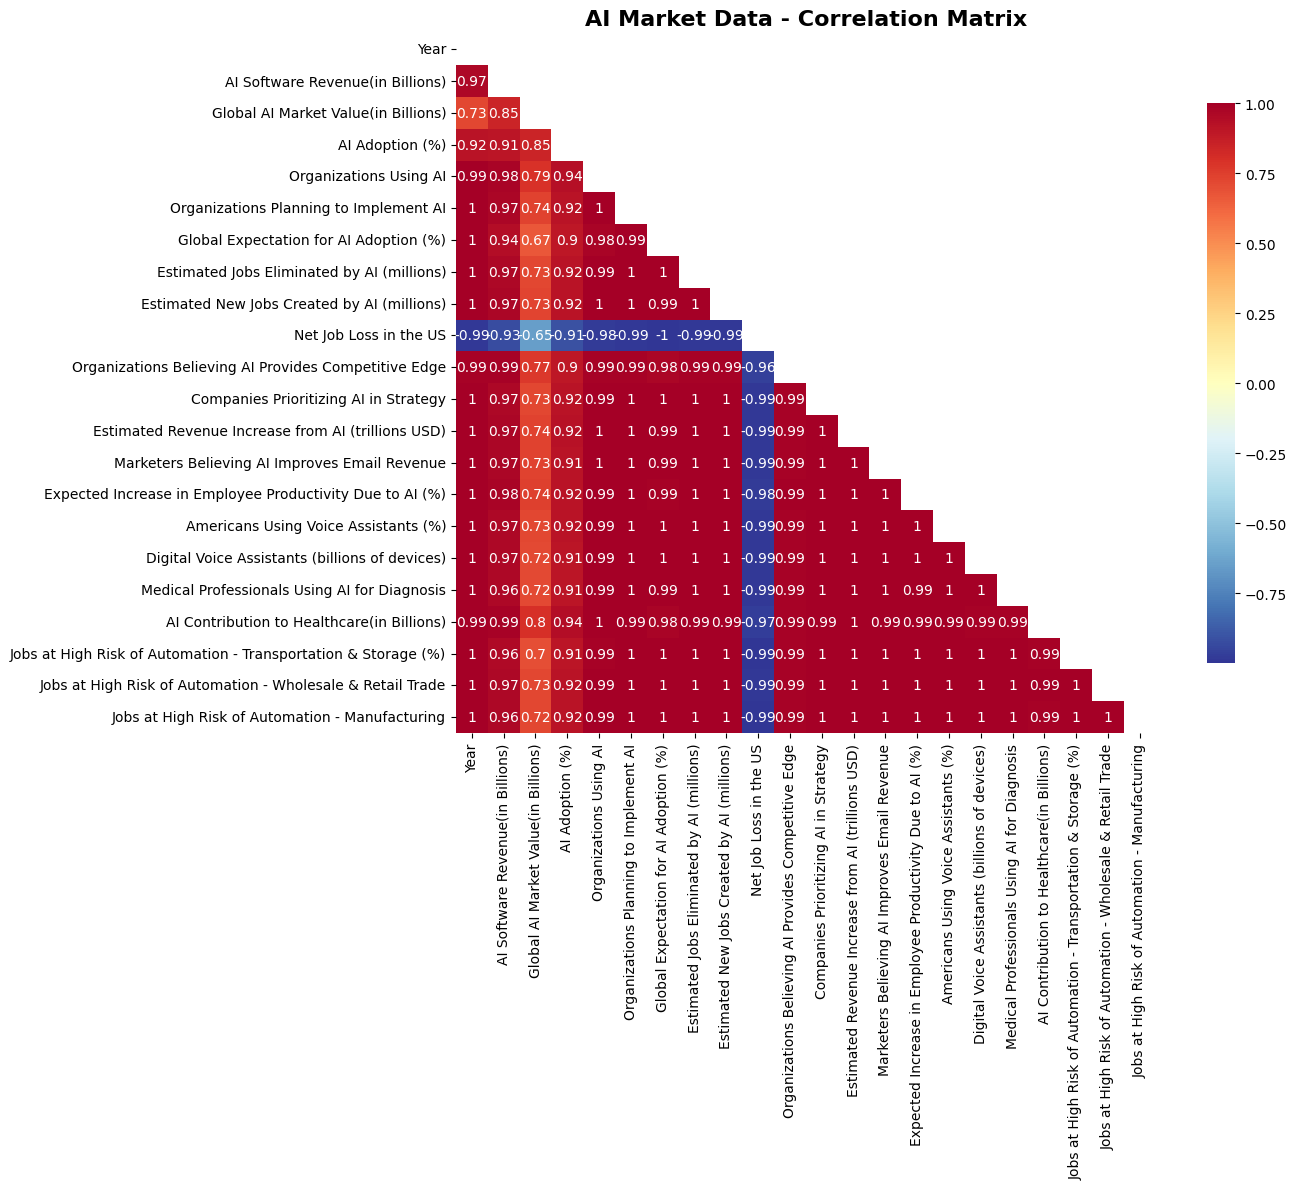


🔗 STRONGEST CORRELATIONS (|r| > 0.7):
   Year ↔ Estimated Jobs Eliminated by AI (millions): 1.000
   Year ↔ Companies Prioritizing AI in Strategy: 1.000
   Year ↔ Americans Using Voice Assistants (%): 1.000
   Year ↔ Jobs at High Risk of Automation - Wholesale & Retail Trade: 1.000
   Estimated Jobs Eliminated by AI (millions) ↔ Companies Prioritizing AI in Strategy: 1.000
   Estimated Jobs Eliminated by AI (millions) ↔ Americans Using Voice Assistants (%): 1.000
   Estimated Jobs Eliminated by AI (millions) ↔ Jobs at High Risk of Automation - Wholesale & Retail Trade: 1.000
   Companies Prioritizing AI in Strategy ↔ Americans Using Voice Assistants (%): 1.000
   Companies Prioritizing AI in Strategy ↔ Jobs at High Risk of Automation - Wholesale & Retail Trade: 1.000
   Americans Using Voice Assistants (%) ↔ Jobs at High Risk of Automation - Wholesale & Retail Trade: 1.000
   Estimated New Jobs Created by AI (millions) ↔ Marketers Believing AI Improves Email Revenue: 1.000
   Year ↔ E

In [ ]:
# Prepare numeric data for correlation analysis
# Convert percentage columns to numeric
market_numeric = market_df.copy()

# Convert percentage columns
percentage_cols = [col for col in market_df.columns if '%' in str(market_df[col].iloc[0]) if pd.notna(market_df[col].iloc[0])]

for col in percentage_cols:
    if market_numeric[col].dtype == 'object':
        market_numeric[col] = pd.to_numeric(market_numeric[col].str.rstrip('%'), errors='coerce')

# Select numeric columns for correlation
numeric_cols = market_numeric.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
if len(numeric_cols) > 1:
    corr_matrix = market_numeric[numeric_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(15, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
                square=True, mask=mask, cbar_kws={"shrink": .8})
    plt.title('AI Market Data - Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find strongest correlations
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
    
    strong_corr_df = pd.DataFrame(strong_corr, columns=['Variable 1', 'Variable 2', 'Correlation'])
    strong_corr_df = strong_corr_df.sort_values('Correlation', key=abs, ascending=False)
    display(strong_corr_df)

## 11. Initial Insights and Key Findings

In [ ]:
# Generate initial insights
# Market growth analysis
revenue_growth = ((market_df['AI Software Revenue(in Billions)'].iloc[-1] / 
                  market_df['AI Software Revenue(in Billions)'].iloc[0]) - 1) * 100
market_growth = ((market_df['Global AI Market Value(in Billions)'].iloc[-1] / 
                 market_df['Global AI Market Value(in Billions)'].iloc[0]) - 1) * 100

# Job impact analysis
jobs_eliminated_2025 = market_df['Estimated Jobs Eliminated by AI (millions)'].iloc[-1]
jobs_created_2025 = market_df['Estimated New Jobs Created by AI (millions)'].iloc[-1]
net_job_impact = jobs_created_2025 - jobs_eliminated_2025

# Adoption trends
adoption_start = float(market_df['AI Adoption (%)'].iloc[0].rstrip('%'))
adoption_end = float(market_df['AI Adoption (%)'].iloc[-1].rstrip('%'))
adoption_change = adoption_end - adoption_start

# Create summary DataFrame
insights_data = {
    'Metric': [
        'AI Software Revenue Growth (2018-2025)',
        'AI Market Value Growth (2018-2025)', 
        'Jobs Eliminated by 2025 (millions)',
        'Jobs Created by 2025 (millions)',
        'Net Job Impact (millions)',
        'AI Adoption Start (2018)',
        'AI Adoption End (2025)',
        'Adoption Change (percentage points)'
    ],
    'Value': [
        f"{revenue_growth:.1f}%",
        f"{market_growth:.1f}%",
        jobs_eliminated_2025,
        jobs_created_2025,
        f"{net_job_impact:+.1f}",
        f"{adoption_start}%",
        f"{adoption_end}%",
        f"+{adoption_change}"
    ]
}

insights_df = pd.DataFrame(insights_data)
display(insights_df)

🔍 INITIAL INSIGHTS AND KEY FINDINGS
📈 AI Software Revenue Growth (2018-2025): 1147.5%
📈 AI Market Value Growth (2018-2025): 6035.6%


TypeError: unsupported operand type(s) for -: 'str' and 'str'

## 12. Data Export for Next Phase

In [ ]:
# Save exploration results for next notebooks
results_dir = Path('../results')
results_dir.mkdir(exist_ok=True)

# Save data quality summary
quality_summary = {
    'market_data_quality': market_quality,
    'popularity_data_quality': popularity_quality,
    'exploration_timestamp': pd.Timestamp.now().isoformat()
}

# Convert to DataFrame for easy saving
quality_df = pd.DataFrame([
    {'dataset': 'AI_Market', 'metric': 'rows', 'value': market_quality['shape'][0]},
    {'dataset': 'AI_Market', 'metric': 'columns', 'value': market_quality['shape'][1]},
    {'dataset': 'AI_Market', 'metric': 'missing_pct', 'value': market_quality['missing_percentage']},
    {'dataset': 'AI_Popularity', 'metric': 'rows', 'value': popularity_quality['shape'][0]},
    {'dataset': 'AI_Popularity', 'metric': 'columns', 'value': popularity_quality['shape'][1]},
    {'dataset': 'AI_Popularity', 'metric': 'missing_pct', 'value': popularity_quality['missing_percentage']},
])

quality_df.to_csv(results_dir / 'data_quality_summary.csv', index=False)

📁 Data quality summary saved to ../results/data_quality_summary.csv

✅ Data Exploration Complete!
📋 Next Steps:
   1. Move to 02_data_cleaning.ipynb for data preprocessing
   2. Use insights from this exploration to guide cleaning decisions
   3. Focus on high-correlation variables for feature engineering
